### Wallmart sales data set

Based on wallmart weekly sales, forecast 12 subsequent months of sales.

Weekly_Sales is a numerical continuos variable that will be squased. All Store sales will be squased into a sum monthly sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,FALSE
1,1,1,2010-02-12,46039.49,TRUE
2,1,1,2010-02-19,41595.55,FALSE
3,1,1,2010-02-26,19403.54,FALSE
4,1,1,2010-03-05,21827.90,FALSE
5,1,1,2010-03-12,21043.39,FALSE
6,1,1,2010-03-19,22136.64,FALSE
7,1,1,2010-03-26,26229.21,FALSE
8,1,1,2010-04-02,57258.43,FALSE
9,1,1,2010-04-09,42960.91,FALSE


In [ ]:
df.shape

(70562, 5)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
monthly_sales = df['Weekly_Sales'].resample('M').sum()

In [ ]:
print(monthly_sales.values)
monthly_sales_flattened = monthly_sales.values

[35023543.17 33006320.3  40996367.46 32832142.47 34256682.57 41125902.09
 33673097.67 31700282.18 39060261.12 37154906.21 52804216.52 30699986.53
 35335583.12 34200567.99 41334364.79 32529557.86 34758701.05 42203098.24
 34347549.79 40273366.69 33256490.75 38687678.01 53396130.96 31748002.88
 36734839.88 44287083.19 35396813.68 34854515.42 45160335.47 35426442.03
 44128998.06 33469048.76 34100939.64]


In [ ]:
len(monthly_sales_flattened)

33

In [ ]:
num_stores = df['Store'].nunique()
num_stores

8

In [ ]:
index = pd.date_range(start='2010-01-31', periods=len(monthly_sales_flattened), freq='M')
index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
series = pd.Series(monthly_sales_flattened, index=index)
series

2010-01-31    35023543.17
2010-02-28    33006320.30
2010-03-31    40996367.46
2010-04-30    32832142.47
2010-05-31    34256682.57
2010-06-30    41125902.09
2010-07-31    33673097.67
2010-08-31    31700282.18
2010-09-30    39060261.12
2010-10-31    37154906.21
2010-11-30    52804216.52
2010-12-31    30699986.53
2011-01-31    35335583.12
2011-02-28    34200567.99
2011-03-31    41334364.79
2011-04-30    32529557.86
2011-05-31    34758701.05
2011-06-30    42203098.24
2011-07-31    34347549.79
2011-08-31    40273366.69
2011-09-30    33256490.75
2011-10-31    38687678.01
2011-11-30    53396130.96
2011-12-31    31748002.88
2012-01-31    36734839.88
2012-02-29    44287083.19
2012-03-31    35396813.68
2012-04-30    34854515.42
2012-05-31    45160335.47
2012-06-30    35426442.03
2012-07-31    44128998.06
2012-08-31    33469048.76
2012-09-30    34100939.64
Freq: M, dtype: float64

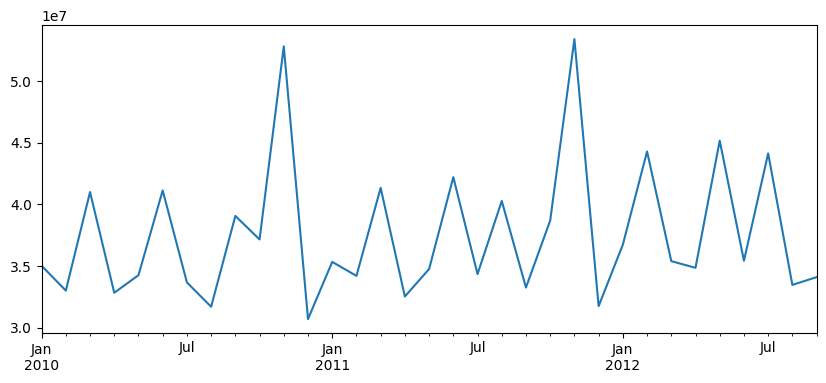

In [ ]:
series.plot()
plt.show()

Time Series analysis and preparation

Trend analysis

Calculating moving average to smooth the series.


*   Using 6 months window
*   Subtract the mean out of this window



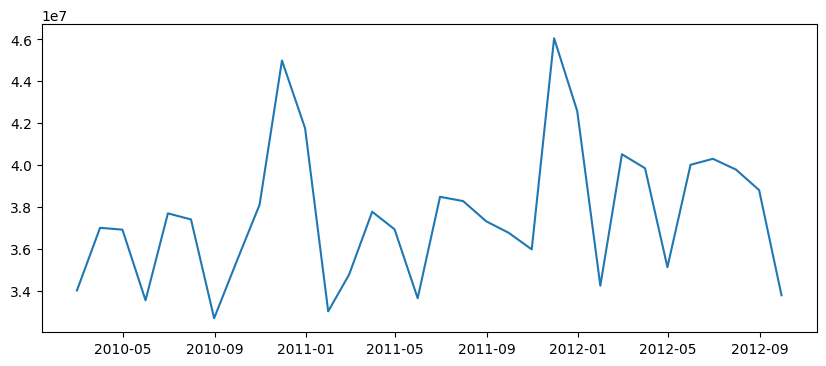

In [ ]:
moving_average = series.rolling(window=2)
moving_average = moving_average.mean()

plt.plot(moving_average);

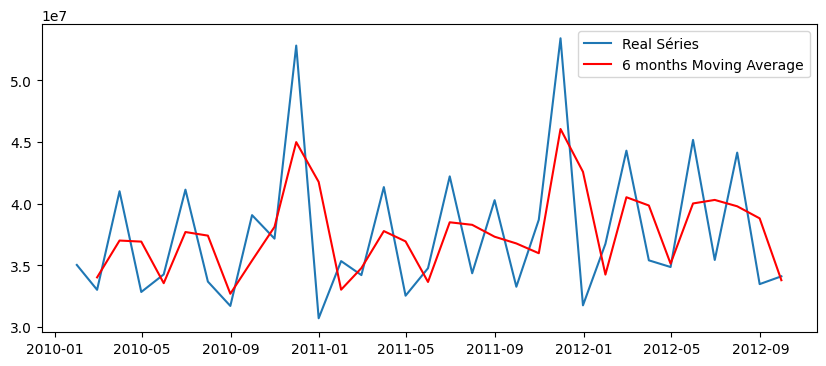

In [ ]:
plt.plot(series, label='Real Séries')
plt.plot(moving_average,color='red', label='6 months Moving Average')
plt.legend(loc='best')
plt.show()

## Decomposition

We will decompose the series to analyse trend, seasonality and residues

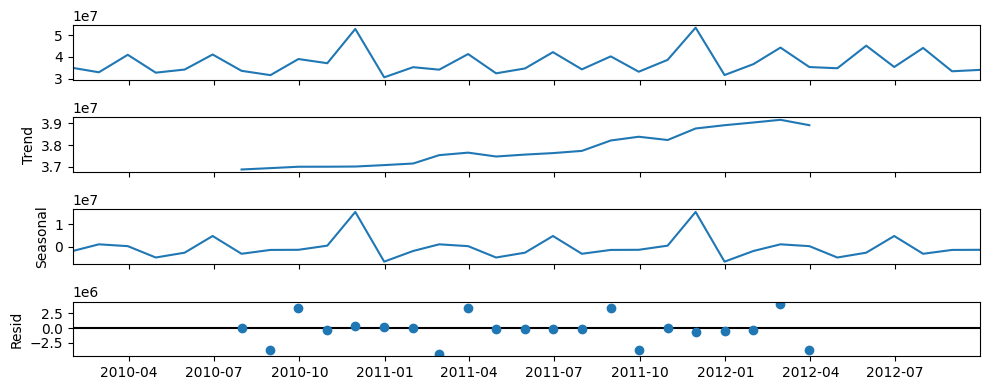

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(series, period=12)
decomposition.plot()
plt.show()

## Veryfing data normality

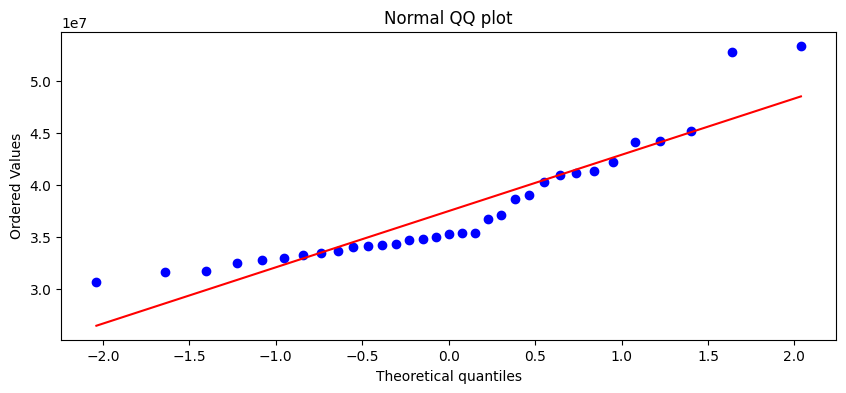

In [ ]:
stats.probplot(series, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

We can verify that the data does not approximate a normal distribution at all!

**Teste Shapiro-Wilk**

CRITERIA:

SIGNIFICANCE LEVEL OF 0,05 ou 5% (MOST USED)

Ho = normal distribution p > 0,05

Ha = not normal distribution p <= 0,05

In [ ]:
e, p = stats.shapiro(series)
print('Test statistics: {}'.format(e))
print('p-value: {}'.format(p))

Test statistics: 0.8572278618812561
p-value: 0.0004930522991344333


Lets attempt to approximate a normal distribution


Inicially we will try a cubic, then log transformation, seeking to reduce variance and improve normality

In [ ]:
series2 = np.sign(series)*abs(series)**(1/3)
series2

2010-01-31    327.179959
2010-02-28    320.773909
2010-03-31    344.811540
2010-04-30    320.208661
2010-05-31    324.774384
2010-06-30    345.174321
2010-07-31    322.919563
2010-08-31    316.485907
2010-09-30    339.295720
2010-10-31    333.686566
2010-11-30    375.165477
2010-12-31    313.121384
2011-01-31    328.148750
2011-02-28    324.596954
2011-03-31    345.756555
2011-04-30    319.221931
2011-05-31    326.353178
2011-06-30    348.162061
2011-07-31    325.061290
2011-08-31    342.772505
2011-09-30    321.582302
2011-10-31    338.213461
2011-11-30    376.562091
2011-12-31    316.644637
2012-01-31    332.424265
2012-02-29    353.800975
2012-03-31    328.338183
2012-04-30    326.652773
2012-05-31    356.111271
2012-06-30    328.429767
2012-07-31    353.379503
2012-08-31    322.265976
2012-09-30    324.281457
Freq: M, dtype: float64

In [ ]:
e, p = stats.shapiro(series2)
print('Test statistics: {}'.format(e))
print('p-valor: {}'.format(p))

Test statistics: 0.8856008052825928
p-valor: 0.0023010375443845987


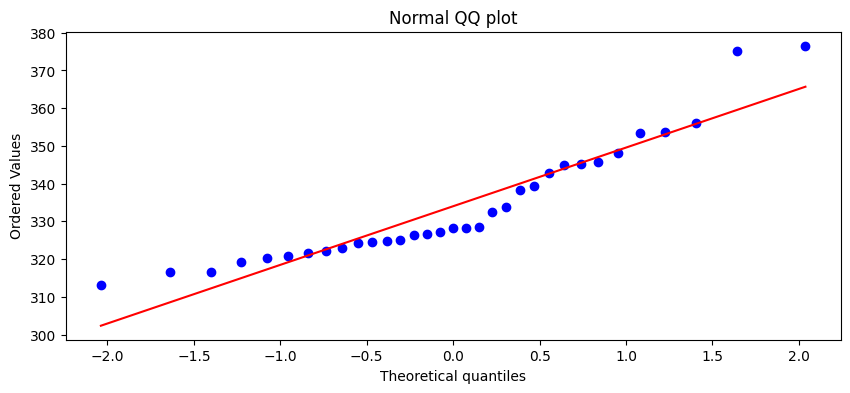

In [ ]:
stats.probplot(series2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Still distant from normal distribution!

In [ ]:
series3 = np.log(series)
series3

2010-01-31    17.371531
2010-02-28    17.312210
2010-03-31    17.528994
2010-04-30    17.306919
2010-05-31    17.349392
2010-06-30    17.532149
2010-07-31    17.332210
2010-08-31    17.271836
2010-09-30    17.480616
2010-10-31    17.430606
2010-11-30    17.782102
2010-12-31    17.239773
2011-01-31    17.380401
2011-02-28    17.347753
2011-03-31    17.537205
2011-04-30    17.297660
2011-05-31    17.363940
2011-06-30    17.558004
2011-07-31    17.352041
2011-08-31    17.511201
2011-09-30    17.319761
2011-10-31    17.471032
2011-11-30    17.793249
2011-12-31    17.273340
2012-01-31    17.419236
2012-02-29    17.606204
2012-03-31    17.382132
2012-04-30    17.366693
2012-05-31    17.625730
2012-06-30    17.382969
2012-07-31    17.602628
2012-08-31    17.326132
2012-09-30    17.344835
Freq: M, dtype: float64

In [ ]:
e, p = stats.shapiro(series3)
print('Test statistics: {}'.format(e))
print('p-valor: {}'.format(p))

Test statistics: 0.8982040286064148
p-valor: 0.004786730278283358


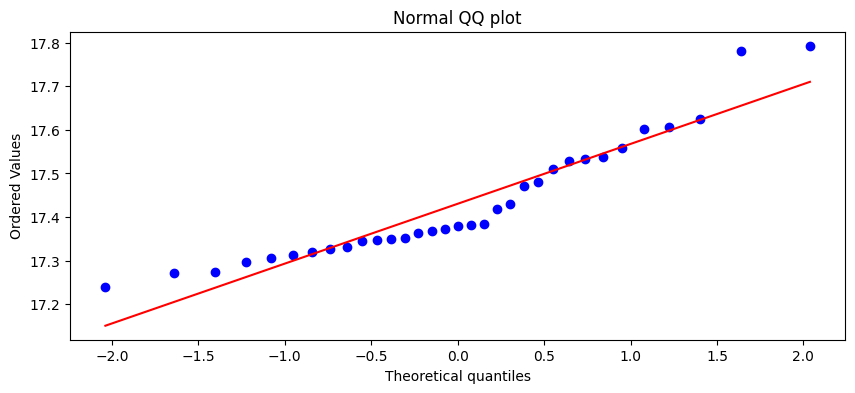

In [ ]:
stats.probplot(series3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Still distant from normal distribution!

<Axes: ylabel='Density'>

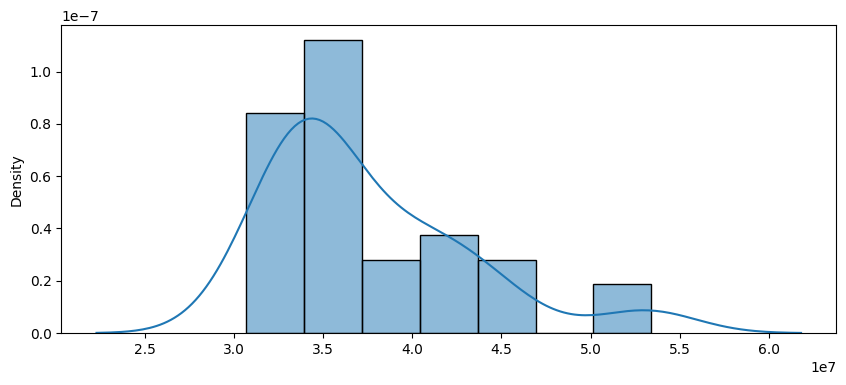

In [ ]:
sns.histplot(
    series, kde=True,
    stat="density", kde_kws=dict(cut=3)
)

<Axes: ylabel='Density'>

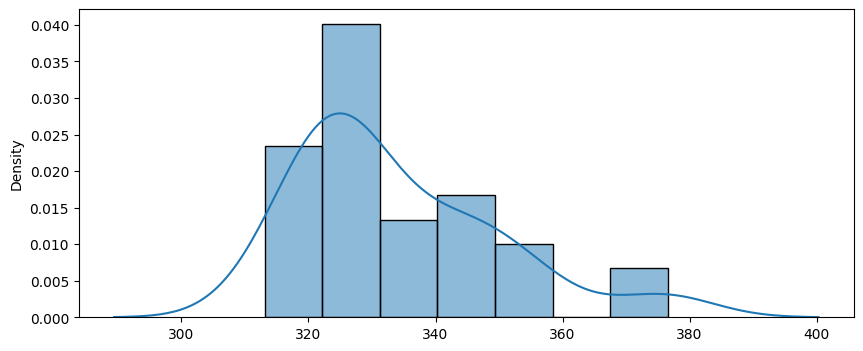

In [ ]:
sns.histplot(
    series2, kde=True,
    stat="density", kde_kws=dict(cut=3)
)

<Axes: ylabel='Density'>

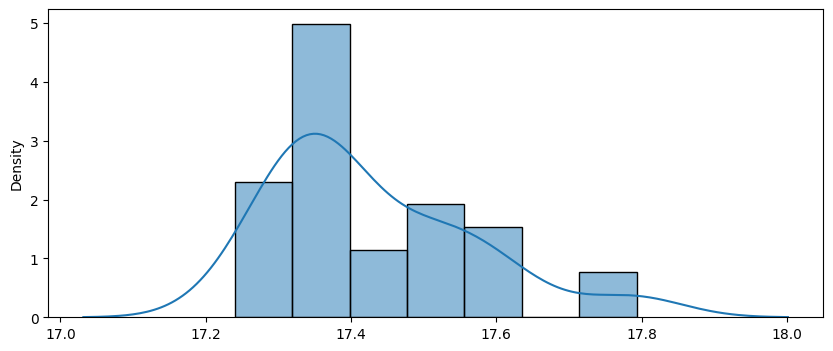

In [ ]:
sns.histplot(
    series3, kde=True,
    stat="density", kde_kws=dict(cut=3)
)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
auto_model = auto_arima(series, trace = True, stepwise = False, seasonal=True, max_p=10, max_q=10, max_P=4, max_Q=4, start_p=0, start_q=0, start_Q=0, m=12)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=711.477, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=713.279, Time=0.09 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=715.270, Time=0.14 sec
 ARIMA(0,0,0)(0,1,3)[12] intercept   : AIC=717.270, Time=0.53 sec
 ARIMA(0,0,0)(0,1,4)[12] intercept   : AIC=719.270, Time=1.13 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=713.290, Time=0.19 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,0)(1,1,3)[12] intercept   : AIC=716.480, Time=2.53 sec
 ARIMA(0,0,0)(1,1,4)[12] intercept   : AIC=inf, Time=5.64 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=715.277, Time=0.49 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=717.227, Time=3.95 sec
 ARIMA(0,0,0)(2,1,3)[12] intercept   : AIC=718.300, Time=4.89 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=717.162, Time=1.48 sec
 ARIMA(0,0,0)(3,1,1)[12] i

In [ ]:
print(auto_model.aic())

710.2127092839963


In [ ]:
result_auto = auto_model.fit(series)
print(result_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -352.106
Date:                            Tue, 19 Dec 2023   AIC                            710.213
Time:                                    22:45:54   BIC                            713.346
Sample:                                01-31-2010   HQIC                           710.893
                                     - 09-30-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.98e+06   9.19e+05      2.154      0.031    1.78e+05    3.78e+06
ar.L1         -0.2616      0.083   

# **Residues Analysis**

Performing residue analysis of the model generated by autoarima.

In [ ]:
residues_auto = result_auto.resid
residues_auto()

2010-01-31    3.345410e+07
2010-02-28    4.018733e+07
2010-03-31    4.764974e+07
2010-04-30    4.157543e+07
2010-05-31    4.086449e+07
2010-06-30    4.810632e+07
2010-07-31    4.245027e+07
2010-08-31    3.852806e+07
2010-09-30    4.537201e+07
2010-10-31    4.539178e+07
2010-11-30    6.054271e+07
2010-12-31    4.253181e+07
2011-01-31    6.362150e+06
2011-02-28   -7.040927e+05
2011-03-31   -1.329588e+06
2011-04-30   -2.194135e+06
2011-05-31   -1.557087e+06
2011-06-30   -7.714523e+05
2011-07-31   -1.023749e+06
2011-08-31    6.769539e+06
2011-09-30   -5.541303e+06
2011-10-31   -1.965256e+06
2011-11-30   -9.871241e+05
2011-12-31   -7.771184e+05
2012-01-31   -3.065773e+05
2012-02-29    8.472554e+06
2012-03-31   -5.279222e+06
2012-04-30   -1.208063e+06
2012-05-31    9.029805e+06
2012-06-30   -6.035903e+06
2012-07-31    6.028947e+06
2012-08-31   -6.225784e+06
2012-09-30   -2.915288e+06
Freq: M, dtype: float64

Plotting the residues.

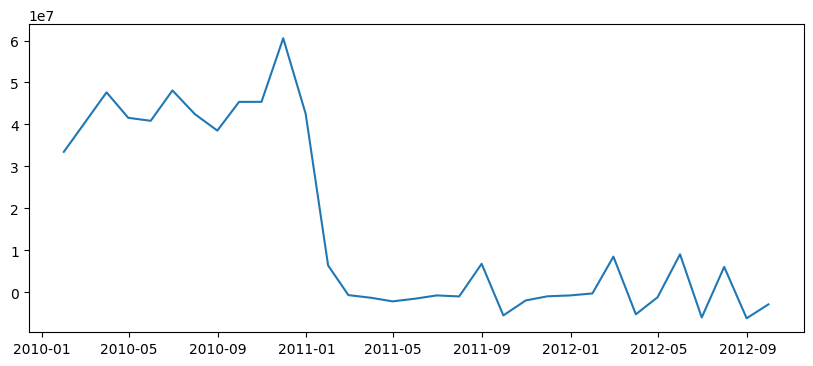

In [ ]:
plt.plot(residues_auto())
plt.show()

**Normality**

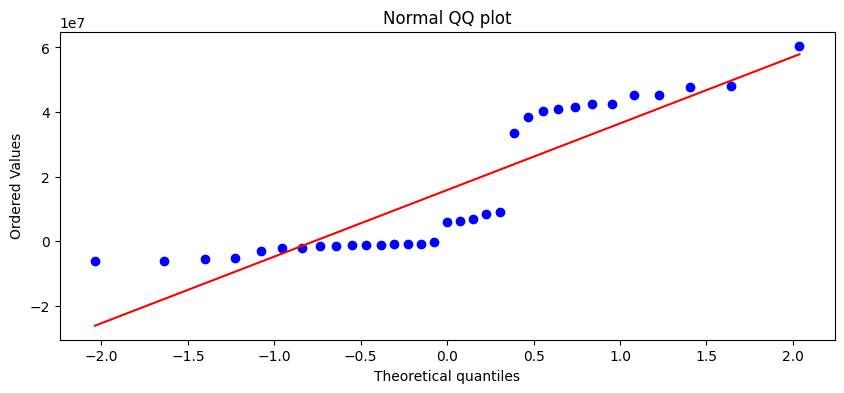

In [ ]:
stats.probplot(residues_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

There is no residue normality at all!


Performing the normality test for the residuals, we observe that the initial and final data deviate slightly from the reference line.

**Shapiro-Wilk Test**

CRITERIA:

SIGNIFICANCE LEVEL OF 0,05 OR 5% (MOST USED)

Ho = normal distribution p > 0,05

Ha = not normal distribution p <= 0,05

In [ ]:
e, p = stats.shapiro(residues_auto())
print('Test statistics: {}'.format(e))
print('p-value: {}'.format(p))

Test statistics: 0.7917404770851135
p-value: 2.2546328182215802e-05


The p-value is < 0.05, indicating that the distribution is not normal.

<Axes: ylabel='Density'>

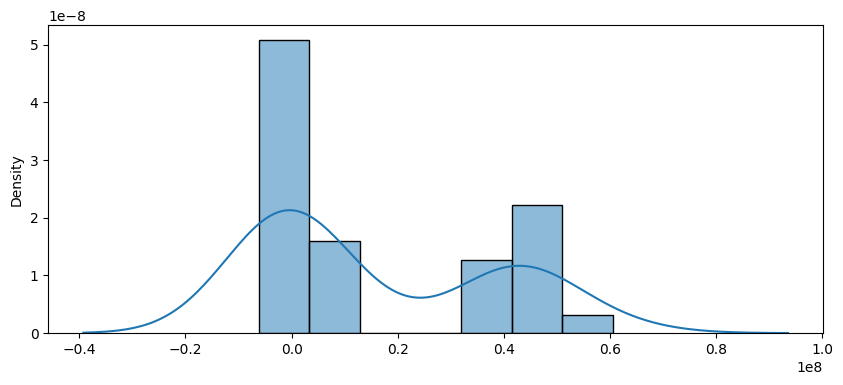

In [ ]:
sns.histplot(
    residues_auto(), kde=True,
    stat="density", kde_kws=dict(cut=3)
)

**Autocorrelation**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

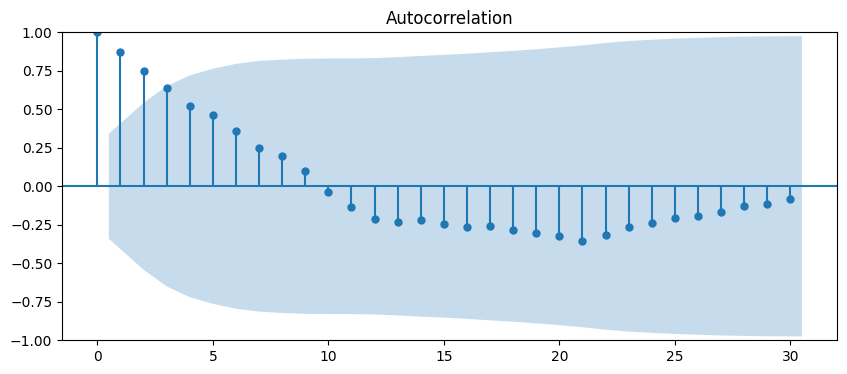

In [ ]:
plot_acf(residues_auto(), lags=30)
plt.show()

The lags fall within the confidence interval, hence there is no autocorrelation in the residues.

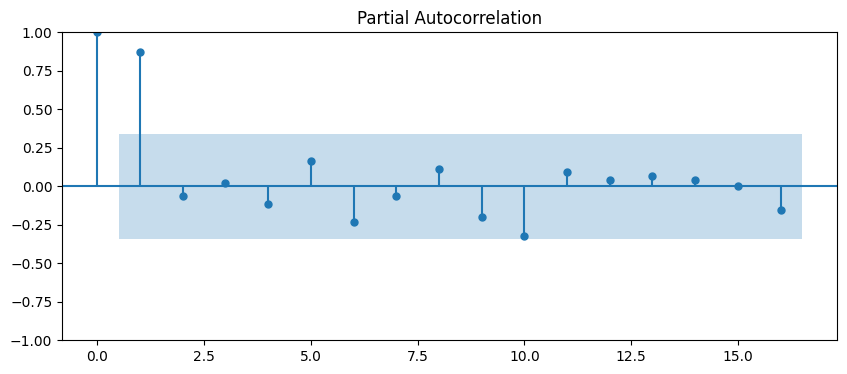

In [ ]:
plot_pacf(residues_auto(), lags=16)
plt.show()

For Partial Autocorrelation we have the same observation, all lags fall within the confidence interval, hence there is no autocorrelation in the residues.

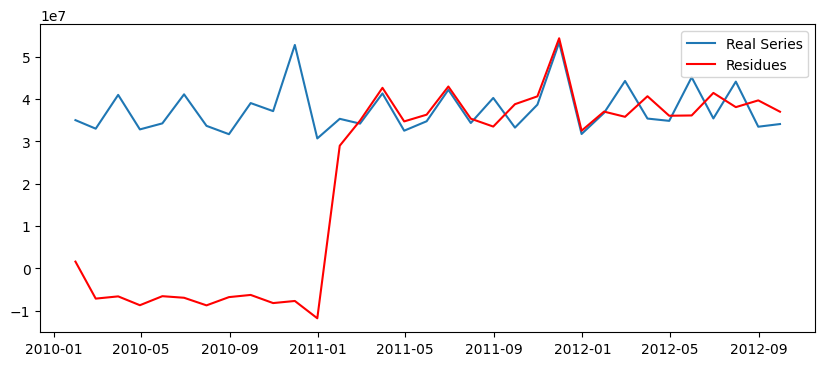

In [ ]:
plt.plot(series, label='Real Series')
plt.plot(series-residues_auto(),color='red', label='Residues')
plt.legend(loc='best')
plt.show()

We not that the residues, in general, don`t closely follow the data.

## **Forecast**

12 months forecast

In [ ]:
forecast_auto = result_auto.predict(n_periods=12, start='2012-09-31')
forecast_auto

2012-10-31    4.044676e+07
2012-11-30    5.491597e+07
2012-12-31    3.333042e+07
2013-01-31    3.830089e+07
2013-02-28    4.585742e+07
2013-03-31    3.696603e+07
2013-04-30    3.642402e+07
2013-05-31    4.672977e+07
2013-06-30    3.699589e+07
2013-07-31    4.569844e+07
2013-08-31    3.503849e+07
2013-09-30    3.567039e+07
Freq: M, dtype: float64

In [ ]:
combined = pd.concat([series, forecast_auto], axis=1)
combined.columns = ['Actual', 'Forecast']

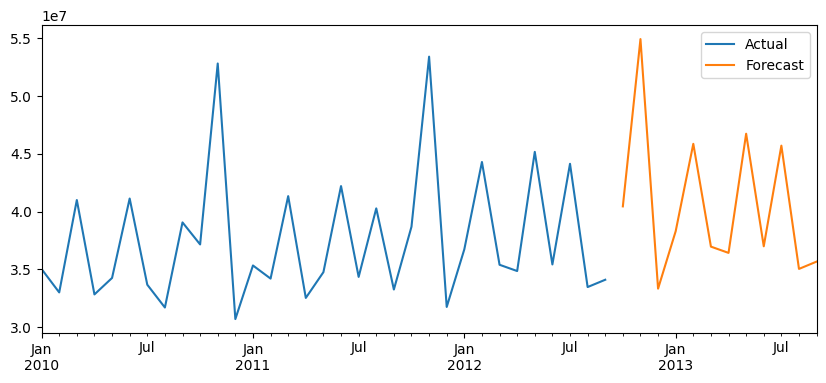

In [ ]:
combined.plot()
plt.show()

Even though data is not normal neither residues, we managed to forecast quite well. The forecast follow the trend, mean and seasonality.